# Importing Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

# import dataset

In [2]:
data = pd.read_csv('Ads_CTR_Optimisation.csv')

# Implement Thompson Sampling

In [3]:
import math , random
N = 500 # number of rounds
d = 10  # number of ads
ads_selected = []  # list to store selected ads
numbers_of_rewards_1 = [0] * d  # rewards for ad shown
numbers_of_rewards_0 = [0] * d  # rewards for ad not shown
total_reward = 0  # total reward
for n in range (0,N):
    ad = 0
    max_random = 0
    for i in range (0,d):
        random_beta = np.random.beta(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)  # append selected ad
    reward = data.values[n, ad]  # get the reward for the selected ad
    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1
    total_reward += reward  # update total reward



# Visualizing the Result

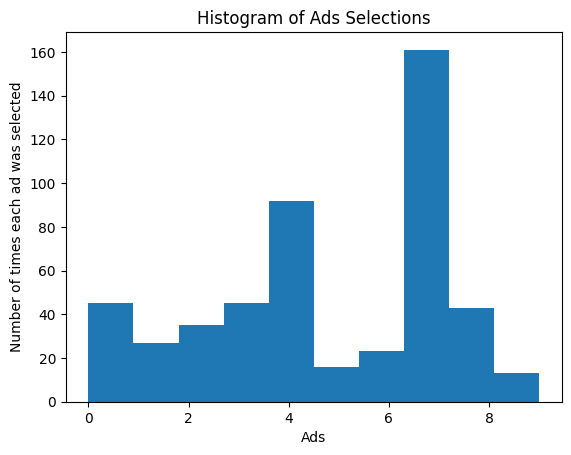

In [4]:
plt.hist(ads_selected)
plt.title('Histogram of Ads Selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()